In [1]:
import sys
import os
sys.path.insert(0, os.getcwd()+'/src/')
sys.path.insert(0, '/home/mcarenso/code/stage-2023-multiscale-extremes/scripts/src/')
from myImports import *
%matplotlib inline
%load_ext autoreload

In [2]:
from ProcessingMCS import ProcessMCS
Re = ProcessMCS()

entire map 8480824.673795126
tranche de latitude :  424041.2336897563
tranche de longitude :  265025.7710560977
s 13251.288552804885
DYAMOND 130E_165E_0N_20N SAM
<xarray.Dataset>
Dimensions:       (lat_global: 20, lon_global: 32, days: 14)
Coordinates:
  * lat_global    (lat_global) int64 0 1 2 3 4 5 6 7 ... 12 13 14 15 16 17 18 19
  * lon_global    (lon_global) int64 0 1 2 3 4 5 6 7 ... 24 25 26 27 28 29 30 31
  * days          (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13
Data variables:
    PW_ac         (lat_global, lon_global, days) float64 ...
    PW_c          (lat_global, lon_global, days) float64 ...
    PW_MCS        (lat_global, lon_global, days) float64 ...
    WindConv_ac   (lat_global, lon_global, days) float64 ...
    WindConv_c    (lat_global, lon_global, days) float64 ...
    WindConv_MCS  (lat_global, lon_global, days) float64 ...
    QVsat_ac      (lat_global, lon_global, days) float64 ...
    QVsat_c       (lat_global, lon_global, days) float64 ...
    QVsat_MCS     

In [3]:
i_t = 200
timelag = 0
my_path = '/homedata/mcarenso/figures/rain_out_of_MCS/DYAMOND/'+'timelag'+str(timelag)+'/'

/home/mcarenso/.conda/envs/PyLMD/lib/python3.8/site-packages/xarray/conventions.py:551: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


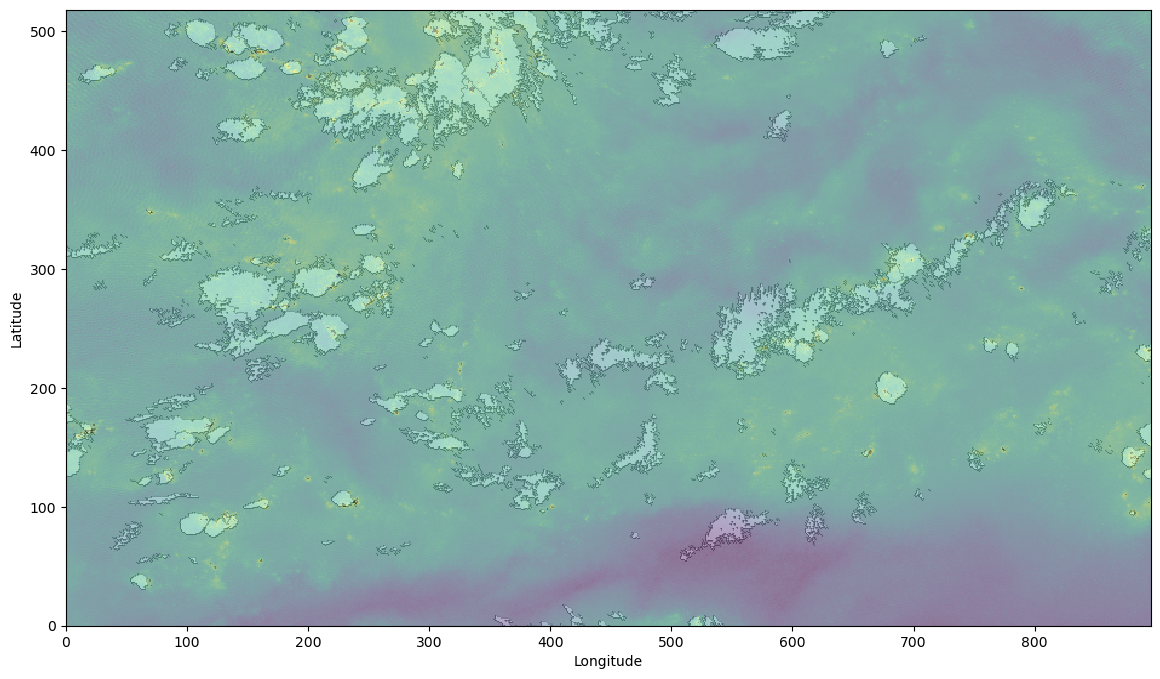

In [4]:
from myFuncs import get_MCS_contour_mask
fig = plt.figure(figsize=(14, 8))


for i_t in np.arange(i_t, i_t+1):
    # Assuming the following functions for loading the data
    Z = Re.load_PW(i_t)
    Precip = Re.loadPrec(i_t)
    Grey = Re.loadLabels(i_t+timelag)
    Grey_contour = get_MCS_contour_mask(Grey.values)

    plt.pcolormesh(Z, cmap='viridis', alpha=1, figure=fig)
    #plt.colorbar(label='Eau précipitable $(mm)$')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    Grey = np.where(np.isnan(Grey), 1, 0)
    plt.pcolormesh(Grey, cmap='Greys', alpha=0.25, figure=fig, label='MCS')

    plt.pcolormesh(Grey_contour, cmap='Greys', alpha=0.25, figure=fig, label='MCS')

    ## Work with masked arrays dude
    
    threshold_value = np.percentile(Precip, 99.9)
    precip_dots = np.where(Precip > threshold_value, 1, 0)
    plt.pcolormesh(precip_dots, cmap='Reds', alpha=0.25, figure=fig, label='P_99')

    # Save the plot as a PNG file
    output_path = my_path + str(i_t) + '.png'
    # plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

/home/mcarenso/.conda/envs/PyLMD/lib/python3.8/site-packages/xarray/conventions.py:551: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


(518, 896)


array([0., 1.], dtype=float32)

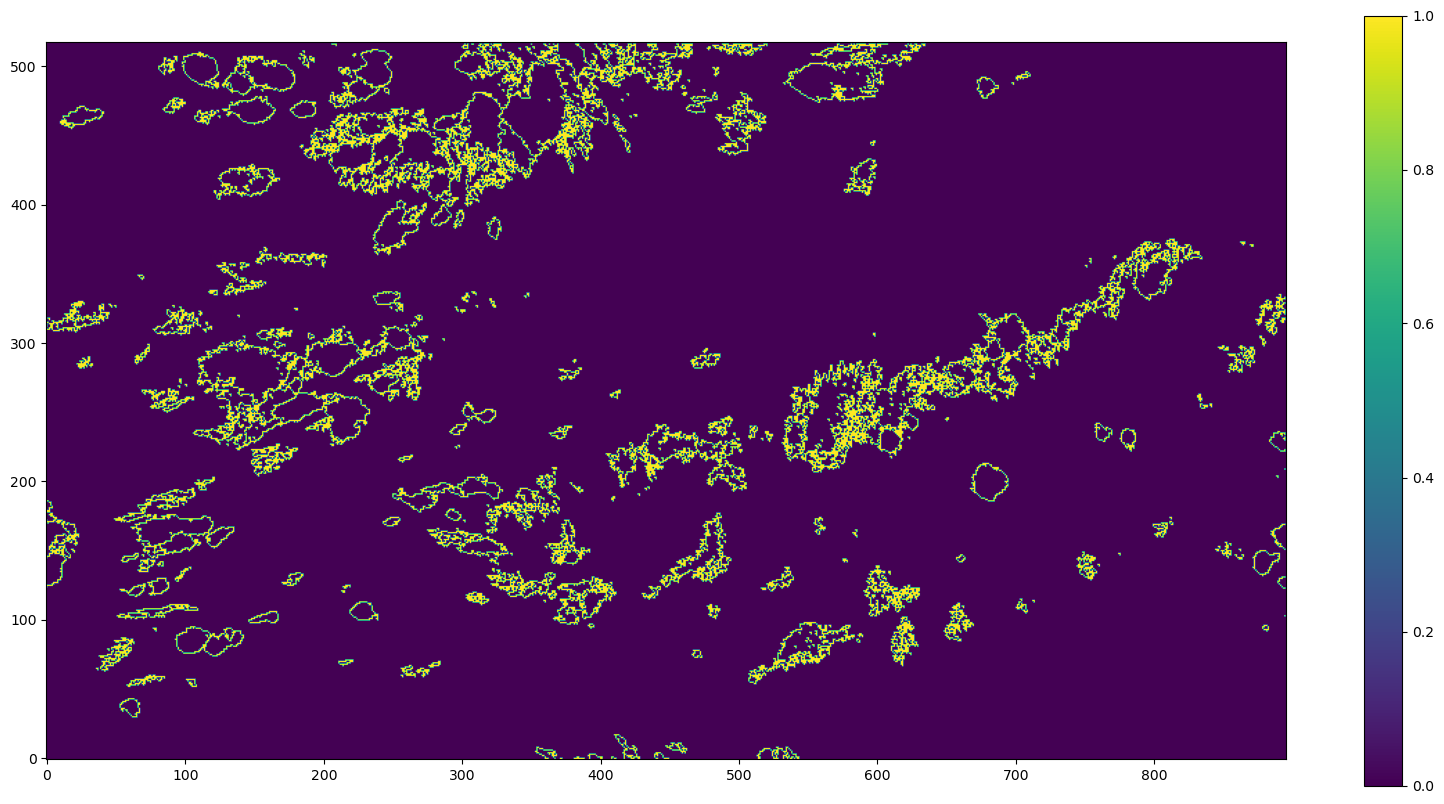

In [6]:
contour = get_MCS_contour_mask(Re.loadLabels(i_t).values)
Re.imshow(contour)
np.unique(contour)

In [17]:
import os
import cv2
import re

def extract_numeric_part(filename):
    # Using regular expression to find the numeric part of the filename
    match = re.search(r'\d+', filename)
    if match:
        return int(match.group())
    return None

def create_video_from_frames(input_folder, output_video_path, fps=30):
    # Get a list of all files in the input folder
    files =  os.listdir(input_folder) 
    files = sorted(files, key=extract_numeric_part)
    if not files:
        print(f"No image files found in '{input_folder}'.")
        return

    # Get the dimensions of the first image to set the video size
    image_path = os.path.join(input_folder, files[0])
    first_image = cv2.imread(image_path)
    height, width, _ = first_image.shape

    # Create a VideoWriter object with H.264 codec
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    for file in files:
        image_path = os.path.join(input_folder, file)
        frame = cv2.imread(image_path)

        # Write the frame to the video
        out.write(frame)

    # Release the video writer
    out.release()
    print(f"Video created: '{output_video_path}'")

input_folder = "/homedata/mcarenso/figures/rain_out_of_MCS/DYAMOND/timelag0"  # Replace this with the path to your folder containing the images
output_video_path = "/homedata/mcarenso/figures/rain_out_of_MCS/DYAMOND/timelag0/output_video_2fps.mp4"  # Change the output video name and format if desired
fps = 2  # Change the frame rate if desired


create_video_from_frames(input_folder, output_video_path, fps)


Video created: '/homedata/mcarenso/figures/rain_out_of_MCS/DYAMOND/timelag0/output_video_2fps.mp4'


(20, 32)


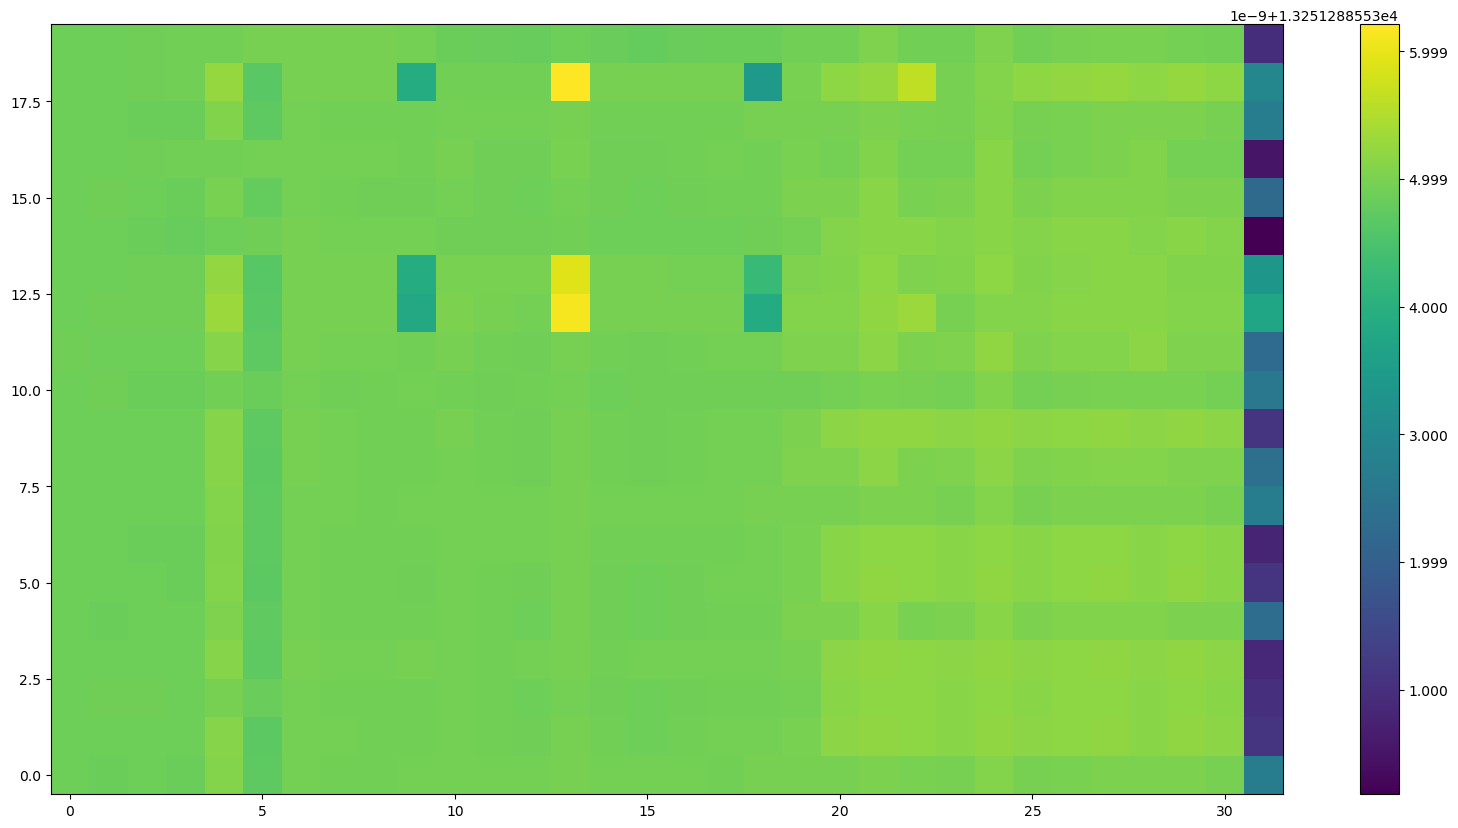

In [17]:
x = Re.grid_surface[:,:]
Re.imshow(x)

In [20]:
## Plot pixel surface

fig = plt.figure(figsize = (15, 10))    
X = Re.pixel_surface

print(X.shape)
plt.imshow(X[0:517], cmap = 'jet', interpolation='nearest')
plt.colorbar()

(518, 896)


In [19]:
from load_TOOCAN_DYAMOND import load_TOOCAN_DYAMOND

MCS = load_TOOCAN_DYAMOND("/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking/TOOCAN-GLOBAL-20160801-20160831.dat.gz")

/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking/TOOCAN-GLOBAL-20160801-20160831.dat.gz
